# Requirements

In [1]:
import speech_recognition as sr

In [2]:
import pyaudio
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\ANAMAYA
[nltk_data]     VYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ANAMAYA
[nltk_data]     VYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import re

In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [5]:
from scipy.sparse.linalg import svds

In [6]:
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

# Speech-input 

### Function to convert speech to readable format

In [7]:
def read_func():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        print("Please say something")
        audio = r.listen(source)
        print("Recognizing Now .... ")
        # recognize speech using google
        l = ""
        try:
            r.recognize_google(audio)
#             print("Audio Recorded Successfully \n ")
        except Exception as e:
            print("Compiling...  " + str(e))
            return "Error : 101"
        l = r.recognize_google(audio)
        return l

In [8]:
def generate_text():
    lines = []
    for x in range(60):
        s = read_func()
        if s == "Error : 101":
            break
        else:
            lines.append(s)
    with open('readme.txt', 'w') as f:
        f.write('.\n'.join(lines))
    f = open("readme.txt", "r")
    print(f.read())

### Take input

In [78]:
generate_text()

Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Please say something
Recognizing Now .... 
Compiling...  
if we wish to eradicate child labour we need to formulate some very effective solutions which will save our children.
it will also enhance the future of any country dealing with the social issues.
to begin with one can create a number of unions that sole

In [79]:
text_file = open("readme.txt", "r")
DOCUMENT = text_file.read()
DOCUMENT = DOCUMENT+"."
text_file.close()
print(DOCUMENT)

if we wish to eradicate child labour we need to formulate some very effective solutions which will save our children.
it will also enhance the future of any country dealing with the social issues.
to begin with one can create a number of unions that solely work to prevent child labour.
it should help children indulging in this world and punishing those who make them do it.
photo moving need to keep the parents in the loop so as to teach them the importance of education.
is the make education free and people aware we will be able to educate more and more children.
moreover making people aware of the harmful consequences of child labour is a must.
in addition family control measures must also be taken.
this will reduce family's bird so when you have lesser mouths to feed the parents will be enough to work for them.
in fact every family must be promised a minimum income by the government.
Government and people must work together.
government should provide employment opportunities so that 

In [64]:
DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization

In [80]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

16

### Pre-Processing

In [81]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['wish eradicate child labour need formulate effective solutions save children',
       'also enhance future country dealing social issues',
       'begin one create number unions solely work prevent child labour'],
      dtype='<U116')

In [83]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(20)

(98, 16)


C:\Users\ANAMAYA VYAS\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
able,0.00,0.00,0.00,0.00,0.0,0.40,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
addition,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.41,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
age,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.20,0.37
also,0.00,0.35,0.00,0.00,0.0,0.00,0.00,0.36,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
appropriate,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.42
average,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.42
aware,0.00,0.00,0.00,0.00,0.0,0.35,0.34,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
begin,0.00,0.00,0.35,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
bird,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.35,0.0,0.0,0.00,0.00,0.00,0.00,0.00
child,0.23,0.00,0.23,0.00,0.0,0.00,0.25,0.00,0.00,0.0,0.0,0.00,0.00,0.27,0.00,0.28


### Latent Symantic Analysis (LSA)

In [84]:
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

##### A matrix containing word counts per document (rows represent unique words and columns represent each document) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns. Documents are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two columns. Values close to 1 represent very similar documents while values close to 0 represent very dissimilar documents.

In [85]:
num_sentences = 6
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(98, 3) (3,) (3, 16)


In [86]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [87]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores


array([0.59358037, 0.65114781, 0.498257  , 0.37991043, 0.25682875,
       0.46956445, 0.5798762 , 0.54846641, 0.19353328, 0.62191443,
       0.79449371, 0.56295958, 0.68112731, 0.50933325, 0.19870656,
       0.40544806])

In [88]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

### Similarity Matrix

In [89]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(16, 16)


array([[1.   , 0.   , 0.113, 0.056, 0.093, 0.051, 0.126, 0.   , 0.   ,
        0.   , 0.   , 0.046, 0.041, 0.134, 0.03 , 0.063],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.125, 0.   ,
        0.   , 0.   , 0.   , 0.197, 0.   , 0.   , 0.   ],
       [0.113, 0.   , 1.   , 0.   , 0.   , 0.   , 0.124, 0.   , 0.044,
        0.   , 0.073, 0.045, 0.   , 0.132, 0.029, 0.116],
       [0.056, 0.   , 0.   , 1.   , 0.   , 0.2  , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.057, 0.052, 0.   , 0.037, 0.   ],
       [0.093, 0.   , 0.   , 0.   , 1.   , 0.106, 0.   , 0.   , 0.093,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.051, 0.   , 0.   , 0.2  , 0.106, 1.   , 0.197, 0.   , 0.   ,
        0.   , 0.117, 0.124, 0.047, 0.   , 0.034, 0.   ],
       [0.126, 0.   , 0.124, 0.   , 0.   , 0.197, 1.   , 0.08 , 0.   ,
        0.075, 0.225, 0.069, 0.   , 0.147, 0.   , 0.069],
       [0.   , 0.125, 0.   , 0.   , 0.   , 0.   , 0.08 , 1.   , 0.   ,
        0.177, 0.12 , 0.  

### Similarity Graph

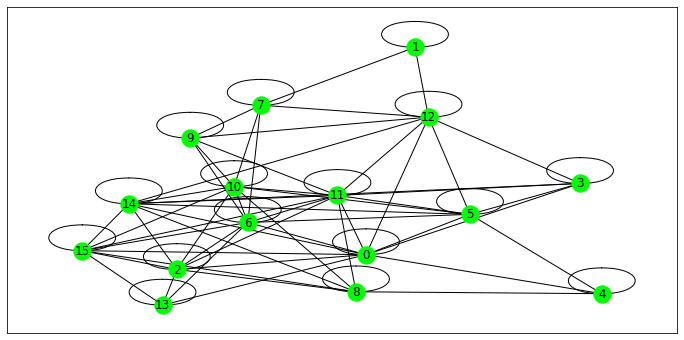

In [90]:
similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph
plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

### Sentence Importance Score

In [91]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.07927357521808784, 10),
 (0.0737345784131608, 6),
 (0.06867449176256651, 11),
 (0.06844698491001563, 5),
 (0.06555135150152841, 0),
 (0.06236841009244814, 2),
 (0.06186642624646457, 12),
 (0.061562194599650934, 15),
 (0.060879261025337694, 9),
 (0.06053000679866458, 7)]

In [92]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

#### Output

In [93]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

if we wish to eradicate child labour we need to formulate some very effective solutions which will save our children.
to begin with one can create a number of unions that solely work to prevent child labour.
is the make education free and people aware we will be able to educate more and more children.
moreover making people aware of the harmful consequences of child labour is a must.
Government and people must work together.
government should provide employment opportunities so that people can work and provide to their children.
